In [119]:
#first import our packages
import numpy as np
from matplotlib.pyplot import *
from astropy.io import ascii
from astropy.io import fits
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stat
import pandas as pd 


In [120]:
db = -102.4
#=7634763939698.856*(10^(C2/10))

#mwatt = 10**(db/10) #=10^(C2/10)
mwatt = 1
watt = mwatt/1e3
hz = watt/30000


cab = hz*(10**0.2)

LNA = cab/(10**3.7)

dpdf = (LNA*2*2)/0.2

TB = (1/(2*1.38064852e-23))*dpdf 

TB = 50

Bin = TB*0.913 # =F2*1000000/461



# integration 
# SUM(G130,G350)
1000000/461

2169.1973969631235

In [121]:
x1 = 130
y1 = 430.441
x2 = 350
y2 = 421.319
k = (D351-D131)/(350-130)
b = (D131-((D351-D131)/(350-130))*130)
# = ((D351-D131)/(350-130))*A2+(D131-((D351-D131)/(350-130))*130)
print(k,b)

NameError: name 'D351' is not defined

In [137]:
time = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180]
        
inte = [1.617561867E+19,1.73695E+19,2.202275358E+19,4.1182E+19,2.225668391E+19,2.95258E+19,7.11525E+18,2.91245E+19,1.43455E+19,2.782383240E+19,2.562081902E+19,2.87704E+19,2.55575E+19,3.81526E+19,2.5015E+19,2.661454917E+19,2.840442329E+19,2.83562E+19,2.248667912E+19]

inte1 = []
ye1 = []
for i in inte:
    i = i*4438
    inte1.append(i)
    

ye = [1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19,1e19]

for i in ye:
    i = i*4438
    ye1.append(i)
max(inte1)

1.82765716e+23

In [138]:
def linfit(xdata, ydata, yerror):
    def U(n):
        U_n = sum((xdata**n)/(yerror**2), 0)
        return U_n
    def W(n): 
        W_n = sum(ydata * (xdata**n) / (yerror**2)) 
        return W_n
    D = U(0) * U(2) - (U(1)**2)
    slope = (U(0)*W(1) - U(1)*W(0)) / D
    intercept = (U(2)*W(0) - U(1)*W(1)) / D
    sigma_slope = U(0)/D
    sigma_intercept = U(2)/D
    print("results")
    print("slope = %.3f +/- %.3f"%(slope, sigma_slope))
    print("intercept = %.3f +/- %.3f"%(intercept, sigma_intercept))

linfit(np.array(time),np.array(inte1),np.array(ye))

results
slope = 168295793359891169280.000 +/- 1754385964912281966517443570434048.000
intercept = 96018179937192971862016.000 +/- 19473684210526336825424235090772230144.000


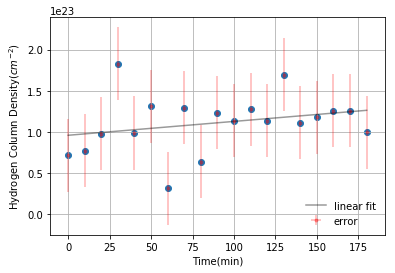

In [140]:
j = np.linspace(0,180)
k = 168295793359891169280.000 * j + 96018179937192971862016.00
plot(j,k,c='k',alpha=0.4,label='linear fit')

plt.scatter(time,inte1)
plt.xlabel(r'Time(min)')
plt.ylabel(r'Hydrogen Column Density($cm^{-2}$)')
grid()
errorbar(time,inte1, yerr=ye1, xerr = 0, fmt='.',label='error',c='r',alpha=0.3)
legend(loc=4, frameon=False)